# Análisis Exploratorio de Datos

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("./Data/Diagnostics.xlsx")

In [3]:
df.head()

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
2,MUSE_20180111_165520_97000,SA,NONE,20,FEMALE,67,67,82,382,403,88,20,11,224,265,415
3,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
4,MUSE_20180112_122850_57000,AF,STDD STTC,73,FEMALE,162,162,114,252,413,68,-40,26,228,285,354


#### Tamaño del dataset

In [4]:
print(df.shape)

(10646, 16)


#### Valores faltantes en columnas

In [5]:
columns_na = df.isna().sum()
columns_na[columns_na!=0]

Series([], dtype: int64)

#### Estudio de la variable objetivo

Se observa un desbalance de datos, donde se tienen 11 clases, y muchas clases minoritarias, por lo tanto se decide eliminar las clases minoritarias que contengan menos de 500 muestras para evitar ruido en los modelos

/tmp/ipykernel_19237/151895532.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


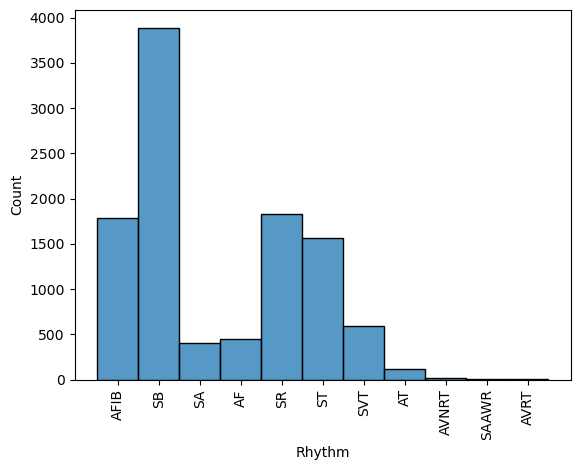

In [6]:
sns.histplot(df["Rhythm"], legend=True)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Se observa que las siguientes clases son candidatas a salir del dataset, por la condición definida previamente:
* AF
* SA
* AT
* AVNRT
* AVRT
* SAAWR

In [7]:
df_value_counts = df['Rhythm'].value_counts()
print(df_value_counts)

SB       3889
SR       1826
AFIB     1780
ST       1568
SVT       587
AF        445
SA        399
AT        121
AVNRT      16
AVRT        8
SAAWR       7
Name: Rhythm, dtype: int64


Se procede a eliminar los datos correspondientes a las clases elegidas

In [8]:
for target_class in df_value_counts.index:
    if df_value_counts[target_class] <= 500:
        df = df[df.Rhythm != target_class]
print(df['Rhythm'].value_counts())

SB      3889
SR      1826
AFIB    1780
ST      1568
SVT      587
Name: Rhythm, dtype: int64


### Nuevo dataset sin las clases ruido

/tmp/ipykernel_19237/151895532.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


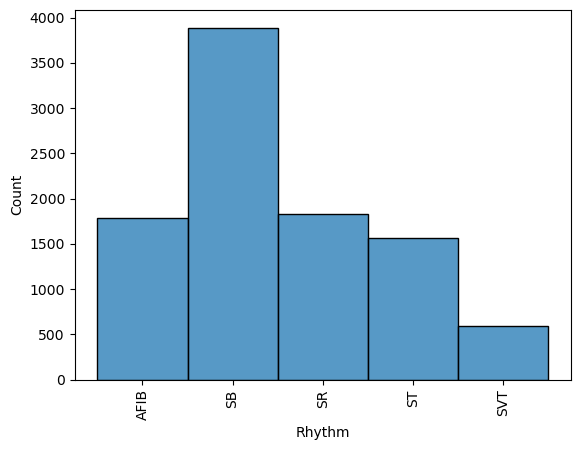

In [9]:
sns.histplot(df["Rhythm"], legend=True)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

### Análisis de las columnas numéricas

In [10]:
df._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
PatientAge,9650.0,59.577098,17.043947,4.0,49.0,61.0,71.0,98.0
VentricularRate,9650.0,82.587150,33.951733,34.0,57.0,71.0,103.0,244.0
AtrialRate,9650.0,89.270052,56.698244,0.0,57.0,70.0,105.0,535.0
QRSDuration,9650.0,90.884145,17.196434,18.0,80.0,88.0,98.0,256.0
QTInterval,9650.0,386.599793,58.767259,114.0,346.0,394.0,428.0,736.0
QTCorrected,9650.0,433.011192,38.326354,219.0,407.0,430.0,455.0,760.0
RAxis,9650.0,38.717824,40.277520,-89.0,14.0,45.0,67.0,269.0
TAxis,9650.0,44.275440,55.885834,-89.0,19.0,41.0,61.0,270.0
QRSCount,9650.0,13.582902,5.594515,5.0,9.0,12.0,17.0,40.0
QOnset,9650.0,219.287565,6.411438,159.0,216.0,219.0,224.0,240.0


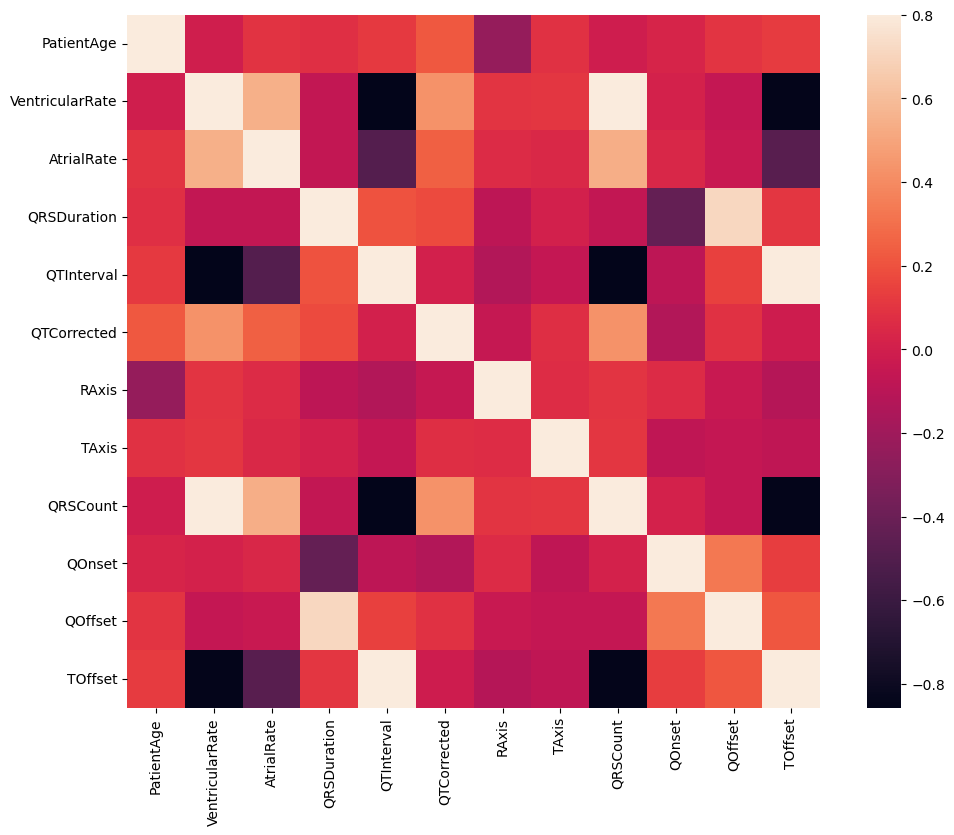

In [11]:
correlation_matrix = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlation_matrix, vmax=.8, square=True);

### Estudio de las variables categóricas

In [12]:
classes_list = list(df.Rhythm.value_counts().index)
classes_list

['SB', 'SR', 'AFIB', 'ST', 'SVT']

In [13]:
query_dict = {}
for c in classes_list:
    query_dict[c] = df.Rhythm == c

### Relación entre la edad de los pacientes y la clase SR

<Axes: xlabel='PatientAge', ylabel='Count'>

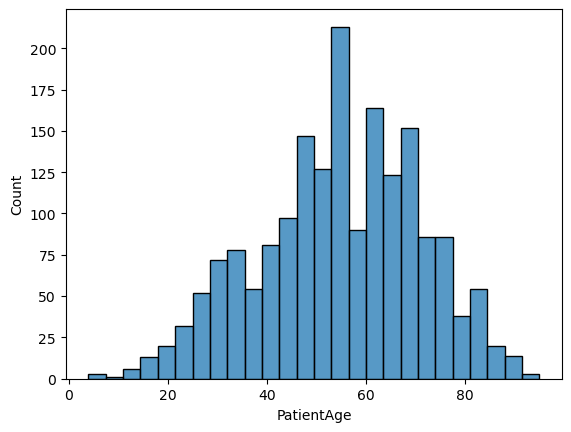

In [14]:
sns.histplot(df[query_dict['SR']]["PatientAge"],legend=True)

### Relación entre la edad de los pacientes y la clase SB

<Axes: xlabel='PatientAge', ylabel='Count'>

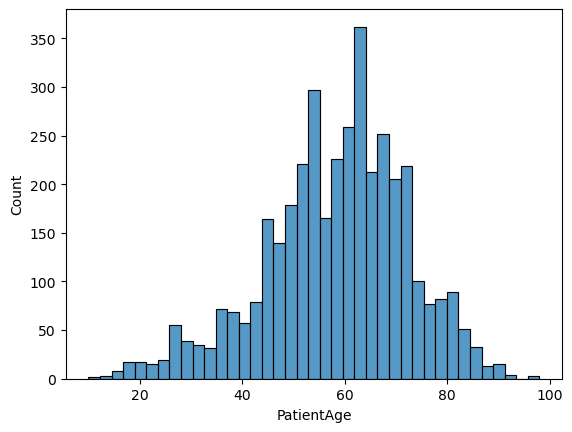

In [15]:
sns.histplot(df[query_dict['SB']]["PatientAge"],legend=True)

### Relación entre la edad de los pacientes y la clase AFIB

<Axes: xlabel='PatientAge', ylabel='Count'>

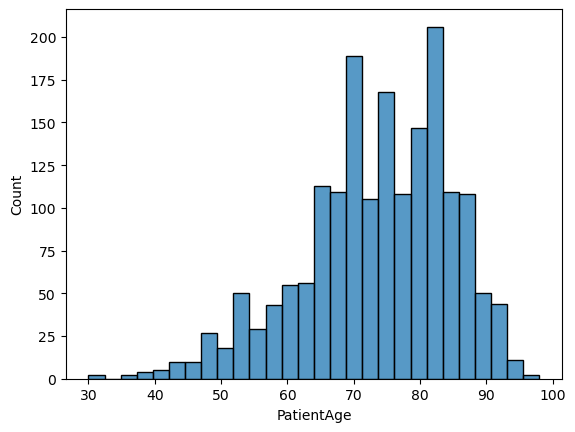

In [16]:
sns.histplot(df[query_dict['AFIB']]["PatientAge"],legend=True)

### Relación entre la edad de los pacientes y la clase ST

<Axes: xlabel='PatientAge', ylabel='Count'>

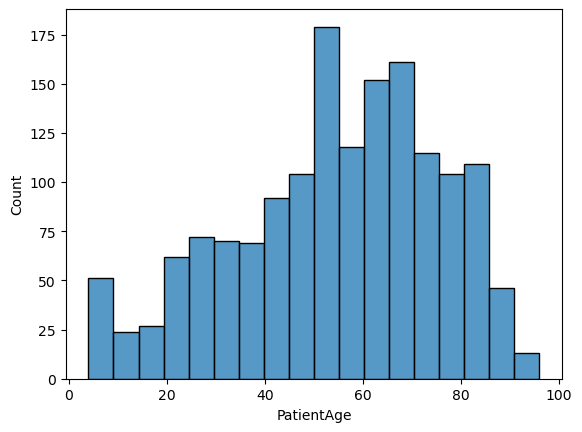

In [17]:
sns.histplot(df[query_dict['ST']]["PatientAge"],legend=True)

### Relación entre la edad de los pacientes y la clase SVT

<Axes: xlabel='PatientAge', ylabel='Count'>

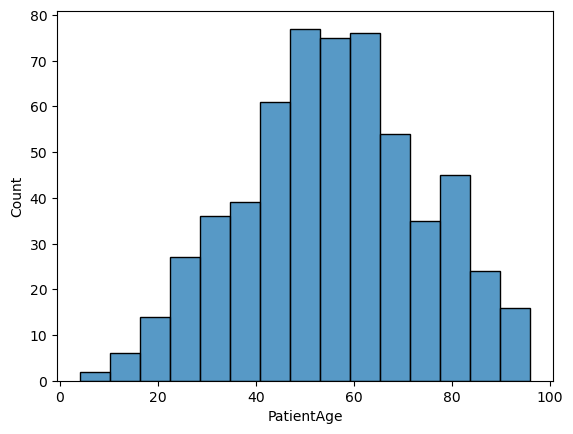

In [18]:
sns.histplot(df[query_dict['SVT']]["PatientAge"],legend=True)